<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

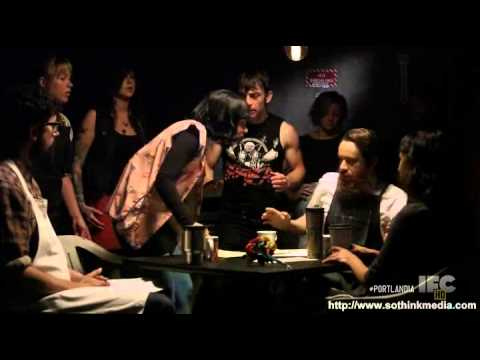

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\PhatDeluxe\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
shops['star_rating'][1][1]

'4'

In [3]:
def strip_words(text):
    rating = int(text[1])
    
    return rating

shops['number_rating'] = shops['star_rating'].apply(strip_words)
# for i in range(0, len(shops['star_rating'])):
#     shops['number_rating'][i] = int(shops['star_rating'][i][1])
    
# shops['number_rating'].head()

In [4]:
shops['number_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: number_rating, dtype: int64

In [5]:
good_shop = shops[shops['number_rating'] >= 4]
bad_shop = shops[shops['number_rating'] <= 3]

In [6]:
good_shop['number_rating'].value_counts()

5    3780
4    2360
Name: number_rating, dtype: int64

In [7]:
bad_shop['number_rating'].value_counts()

3    738
2    460
1    278
Name: number_rating, dtype: int64

In [8]:
# Base
from collections import Counter
import re

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

#library to play sound when nlp is done
from playsound import playsound

nlp = spacy.load("en_core_web_lg")

In [9]:
def get_lemmas(text):
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False) and (token.pos_ != '-PRON-')):
            lemmas.append(token.lemma_)
            
    return lemmas

In [10]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)
playsound('C:/Windows/media/Alarm09.wav')

In [11]:
def count(docs):
    
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [12]:
wc = count(shops['lemmas'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17,,7616,22606,1.0,0.057531,0.057531,1.000000
34,coffee,4826,10100,2.0,0.025704,0.083234,0.633666
81,place,3876,6021,3.0,0.015323,0.098557,0.508929
154,good,3588,5391,4.0,0.013720,0.112277,0.471113
74,great,2843,3924,5.0,0.009986,0.122263,0.373293
36,check,3175,3468,6.0,0.008826,0.131089,0.416886
164,like,2273,3379,7.0,0.008599,0.139688,0.298451
424,come,1932,2637,8.0,0.006711,0.146399,0.253676
490,time,1762,2382,9.0,0.006062,0.152461,0.231355
38,drink,1636,2339,10.0,0.005953,0.158414,0.214811


In [20]:
tokenizer = Tokenizer(nlp.vocab)

In [52]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'Austin', 'shop', 'coffee', "it's", '-',
                                           "i'm", '1', "i've"])

In [53]:
tokens = []


for doc in tokenizer.pipe(shops['full_review_text']):
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [48]:
shops['tokens'].head()

0    [11/25/2016, check-in, love, love, loved, atmo...
1    [12/2/2016, listed, date, night:, austin,, amb...
2    [11/30/2016, check-in, listed, brunch, spots, ...
3    [11/25/2016, cool, decor!, good, drinks, nice,...
4    [12/3/2016, check-in, located, northcross, mal...
Name: tokens, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [49]:
count(shops['tokens']).head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
87,place,3029,4264,1.0,0.011075,0.011075,0.397715
78,great,2438,3250,2.0,0.008441,0.019516,0.320116
179,like,2034,2902,3.0,0.007537,0.027053,0.267069
171,good,2084,2779,4.0,0.007218,0.034271,0.273634
14,check-in,1957,1961,5.0,0.005093,0.039364,0.256959


In [54]:
good_shop = shops[shops['number_rating'] >= 4]
bad_shop = shops[shops['number_rating'] <= 3]

In [55]:
good_count = count(good_shop['tokens'])
good_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
87,place,2432,3389,1.0,0.011352,0.011352,0.396091
78,great,2174,2902,2.0,0.009721,0.021073,0.354072
345,good,1643,2180,3.0,0.007302,0.028375,0.267590
238,like,1486,2068,4.0,0.006927,0.035303,0.242020
5,love,1263,1604,5.0,0.005373,0.040676,0.205700
14,check-in,1598,1602,6.0,0.005366,0.046042,0.260261
607,little,1027,1230,7.0,0.004120,0.050162,0.167264
207,nice,962,1101,8.0,0.003688,0.053850,0.156678
361,best,951,1093,9.0,0.003661,0.057511,0.154886
193,friendly,986,1014,10.0,0.003397,0.060908,0.160586


In [56]:
bad_count = count(bad_shop['tokens'])
bad_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
68,place,597,875,1.0,0.010293,0.010293,0.404472
19,like,548,834,2.0,0.009811,0.020104,0.371274
11,good,441,599,3.0,0.007046,0.027150,0.298780
190,don't,340,430,4.0,0.005058,0.032209,0.230352
85,food,266,369,5.0,0.004341,0.036550,0.180217
126,check-in,359,359,6.0,0.004223,0.040773,0.243225
224,time,264,351,7.0,0.004129,0.044902,0.178862
65,pretty,278,349,8.0,0.004105,0.049007,0.188347
54,great,264,348,9.0,0.004094,0.053101,0.178862
502,people,247,327,10.0,0.003847,0.056948,0.167344


In [58]:
good_top10 = good_count[good_count['rank'] <= 10]
bad_top10 = bad_count[bad_count['rank'] <= 10]

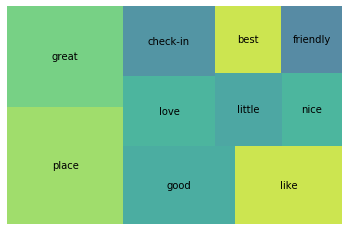

In [59]:
squarify.plot(sizes=good_top10['pct_total'], label=good_top10['word'], alpha=.8)
plt.axis('off')
plt.show()

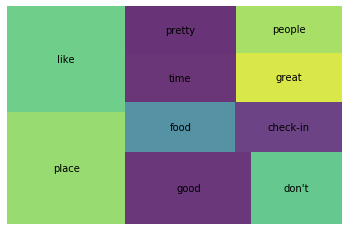

In [60]:
squarify.plot(sizes=bad_top10['pct_total'], label=bad_top10['word'], alpha=.8)
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [89]:
bad_count['rank'].tail(10)

16375    16374.0
16373    16375.0
16368    16376.0
16371    16377.0
16376    16378.0
16369    16379.0
16380    16380.0
16374    16381.0
16382    16382.0
16381    16383.0
Name: rank, dtype: float64

In [90]:
good_count['rank'].tail(10)

34355    34358.0
34358    34359.0
34359    34360.0
34357    34361.0
34360    34362.0
34362    34363.0
34361    34364.0
34363    34365.0
34364    34366.0
34366    34367.0
Name: rank, dtype: float64

In [91]:
good_bottom10 = good_count[good_count['rank'] >= 34355]
bad_bottom10 = bad_count[bad_count['rank'] >= 16375]

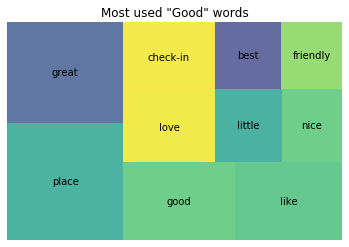

In [102]:
squarify.plot(sizes=good_top10['pct_total'], label=good_top10['word'], alpha=.8)
plt.axis('off')
plt.title('Most used "Good" words')
plt.show()

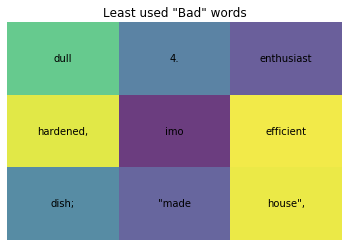

In [103]:
squarify.plot(sizes=bad_bottom10['pct_total'], label=bad_bottom10['word'], alpha=.8)
plt.axis('off')
plt.title('Least used "Bad" words')
plt.show()

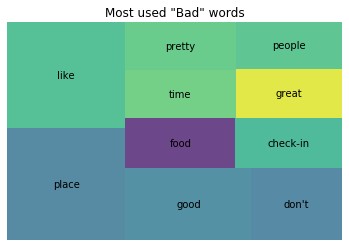

In [101]:
squarify.plot(sizes=bad_top10['pct_total'], label=bad_top10['word'], alpha=.8)
plt.axis('off')
plt.title('Most used "Bad" words')
plt.show()

Text(0.5, 1.0, 'Least used "Good" words')

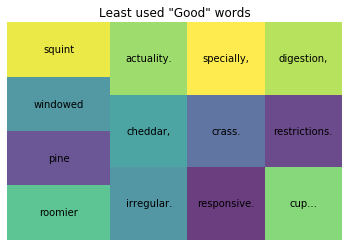

In [100]:
squarify.plot(sizes=good_bottom10['pct_total'], label=good_bottom10['word'], alpha=.8)
plt.axis('off')
plt.title('Least used "Good" words')
plt.show()

In [110]:
shared_word = pd.DataFrame()
for word1 in good_count['word']:
    for word2 in bad_count['word']:
        if word1 == word2:
            word1

TypeError: append() missing 1 required positional argument: 'self'

KeyError: 1

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

